Dataset Development

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

df = pd.read_excel('crop yield data sheet.xlsx')
def generate_synthetic_data(subset_df, num_rows_to_generate):
    synthetic_data = []
    for _ in range(num_rows_to_generate):
        if len(subset_df) > 0:
            new_row = subset_df.sample(1).copy()
            new_row = new_row + np.random.normal(0, 0.1, new_row.shape)
            synthetic_data.append(new_row)
    return pd.concat(synthetic_data, ignore_index=True) if synthetic_data else pd.DataFrame(columns=subset_df.columns)

yield_values = df['Yeild (Q/acre)'].unique()
new_dataframes = []

for yield_value in yield_values:
    subset_df = df[df['Yeild (Q/acre)'] == yield_value]

    if len(subset_df) > 0:
        num_rows_needed = 200 - len(subset_df)

        if num_rows_needed > 0:
            synthetic_data = generate_synthetic_data(subset_df, num_rows_needed)
            subset_df = pd.concat([subset_df, synthetic_data], ignore_index=True)

    new_dataframes.append(subset_df)

final_df = pd.concat(new_dataframes, ignore_index=True)

final_df = final_df.drop_duplicates()
final_df['Yeild (Q/acre)'].value_counts()
final_df.tail()
bd=final_df

In [2]:
bd = bd.rename(columns={'Temperatue': 'temp', 'Nitrogen (N)': 'N','Phosphorus (P)':'P','Potassium (K)':'K','Yeild (Q/acre)':'yeild'})

In [3]:
bd=bd.drop('Rain Fall (mm)',axis=1)
bd = bd[bd['yeild'] != 5]
bd['yeild'].value_counts()

11.000000    21
7.000000     13
10.000000    13
6.000000      9
8.000000      8
             ..
10.069032     1
10.034747     1
10.062419     1
9.896780      1
10.584638     1
Name: yeild, Length: 2514, dtype: int64

In [4]:
bd.to_csv('Last1 dataset.csv',index=False)

In [5]:
df=pd.read_csv("Last1 dataset.csv")

Plots to check dataset

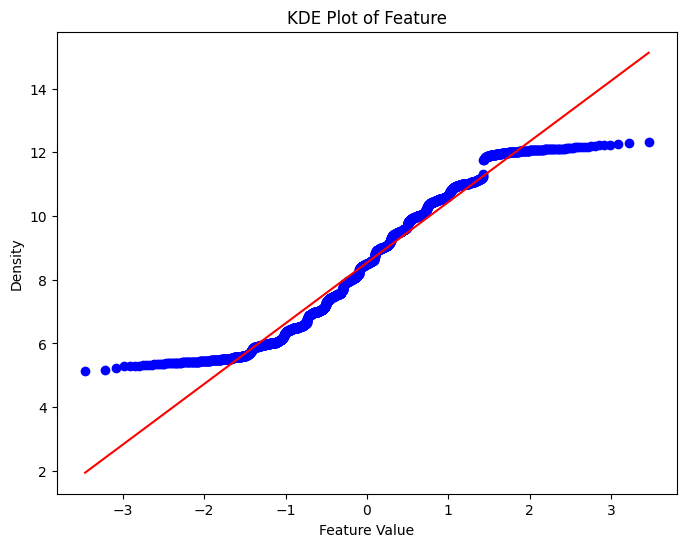

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
stats.probplot(df['yeild'], dist="norm", plot=plt)
plt.title('KDE Plot of Feature')
plt.xlabel('Feature Value')
plt.ylabel('Density')
plt.show()


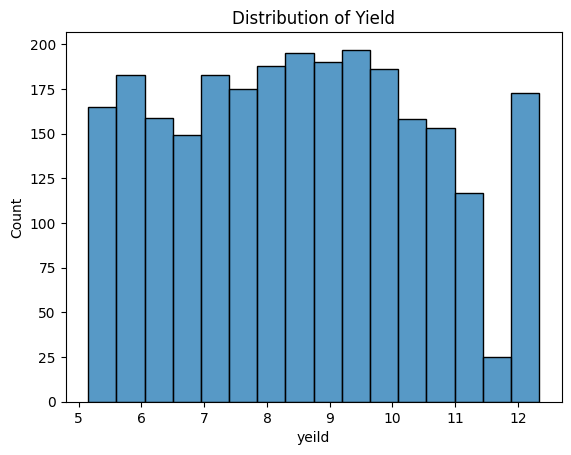

In [7]:
import seaborn as sns
sns.histplot(df['yeild'])
plt.title('Distribution of Yield')
plt.savefig('distribution of Yield.png')
plt.show()

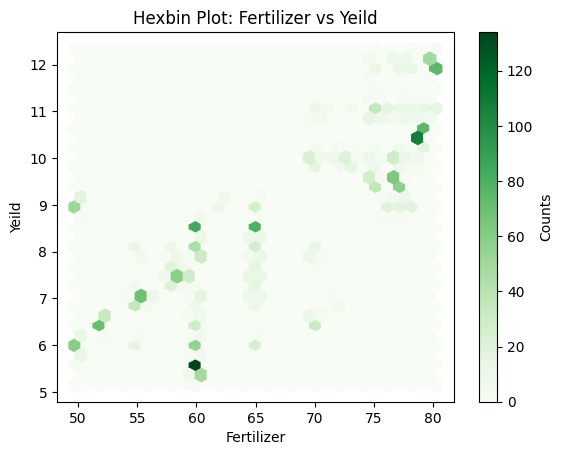

In [8]:
plt.hexbin(df['Fertilizer'], df['yeild'], gridsize=30, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('Fertilizer')
plt.ylabel('Yeild')
plt.title('Hexbin Plot: Fertilizer vs Yeild')
plt.savefig('Hexbin Plot Fertilizer vs yeild.png')
plt.show()

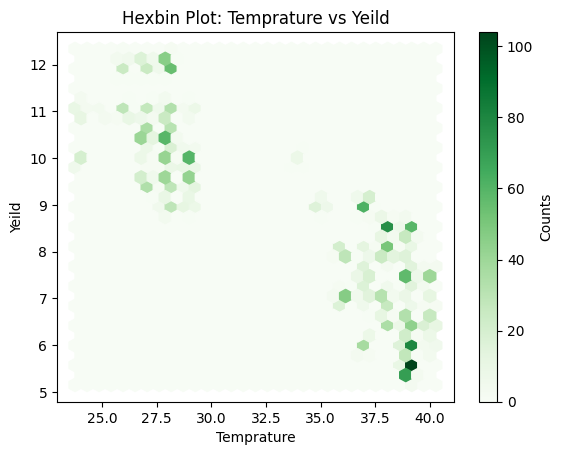

In [9]:
plt.hexbin(df['temp'], df['yeild'], gridsize=30, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('Temprature')
plt.ylabel('Yeild')
plt.title('Hexbin Plot: Temprature vs Yeild')
plt.savefig('Hexbin Plot Temprature vs yeild.png')
plt.show()

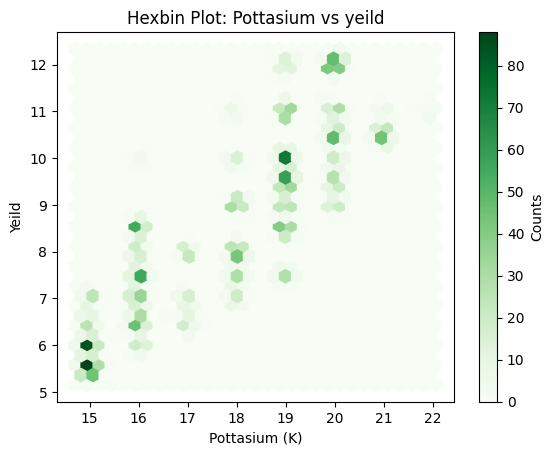

In [10]:
plt.hexbin(df['K'], df['yeild'], gridsize=30, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('Pottasium (K)')
plt.ylabel('Yeild')
plt.title('Hexbin Plot: Pottasium vs yeild')
plt.savefig('Hexbin Plot Pottasium vs yeild.png')
plt.show()

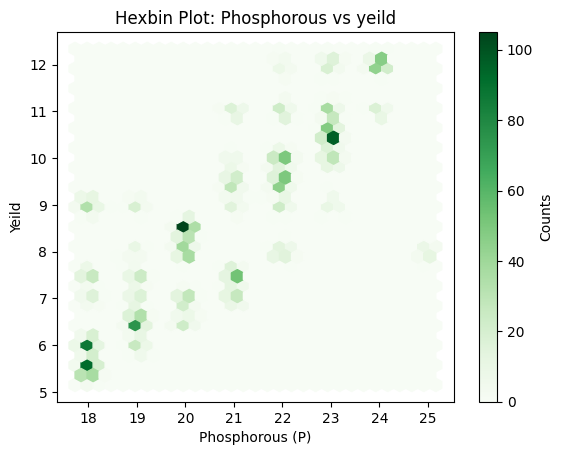

In [11]:
plt.hexbin(df['P'], df['yeild'], gridsize=30, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('Phosphorous (P)')
plt.ylabel('Yeild')
plt.title('Hexbin Plot: Phosphorous vs yeild')
plt.savefig('Hexbin Plot Phosphorous vs yeild.png')
plt.show()

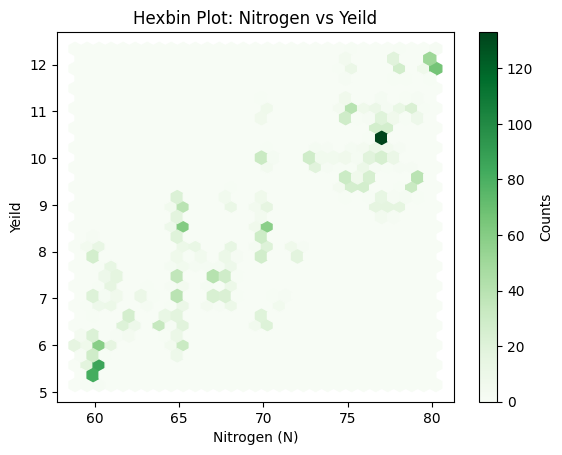

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.hexbin(df['N'], df['yeild'], gridsize=30, cmap='Greens')
plt.colorbar(label='Counts')
plt.xlabel('Nitrogen (N)')
plt.ylabel('Yeild')
plt.title('Hexbin Plot: Nitrogen vs Yeild')
plt.savefig('Hexbin Plot Nitrogen vs Yeild.png')
plt.show()


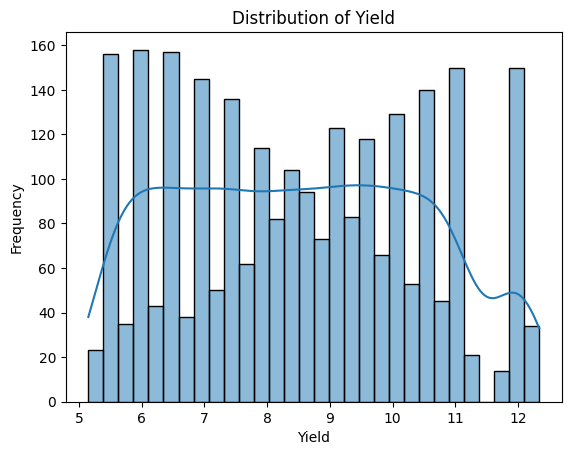

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['yeild'], bins=30, kde=True)
plt.title('Distribution of Yield')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.savefig('histogram_yield.png')
plt.show()


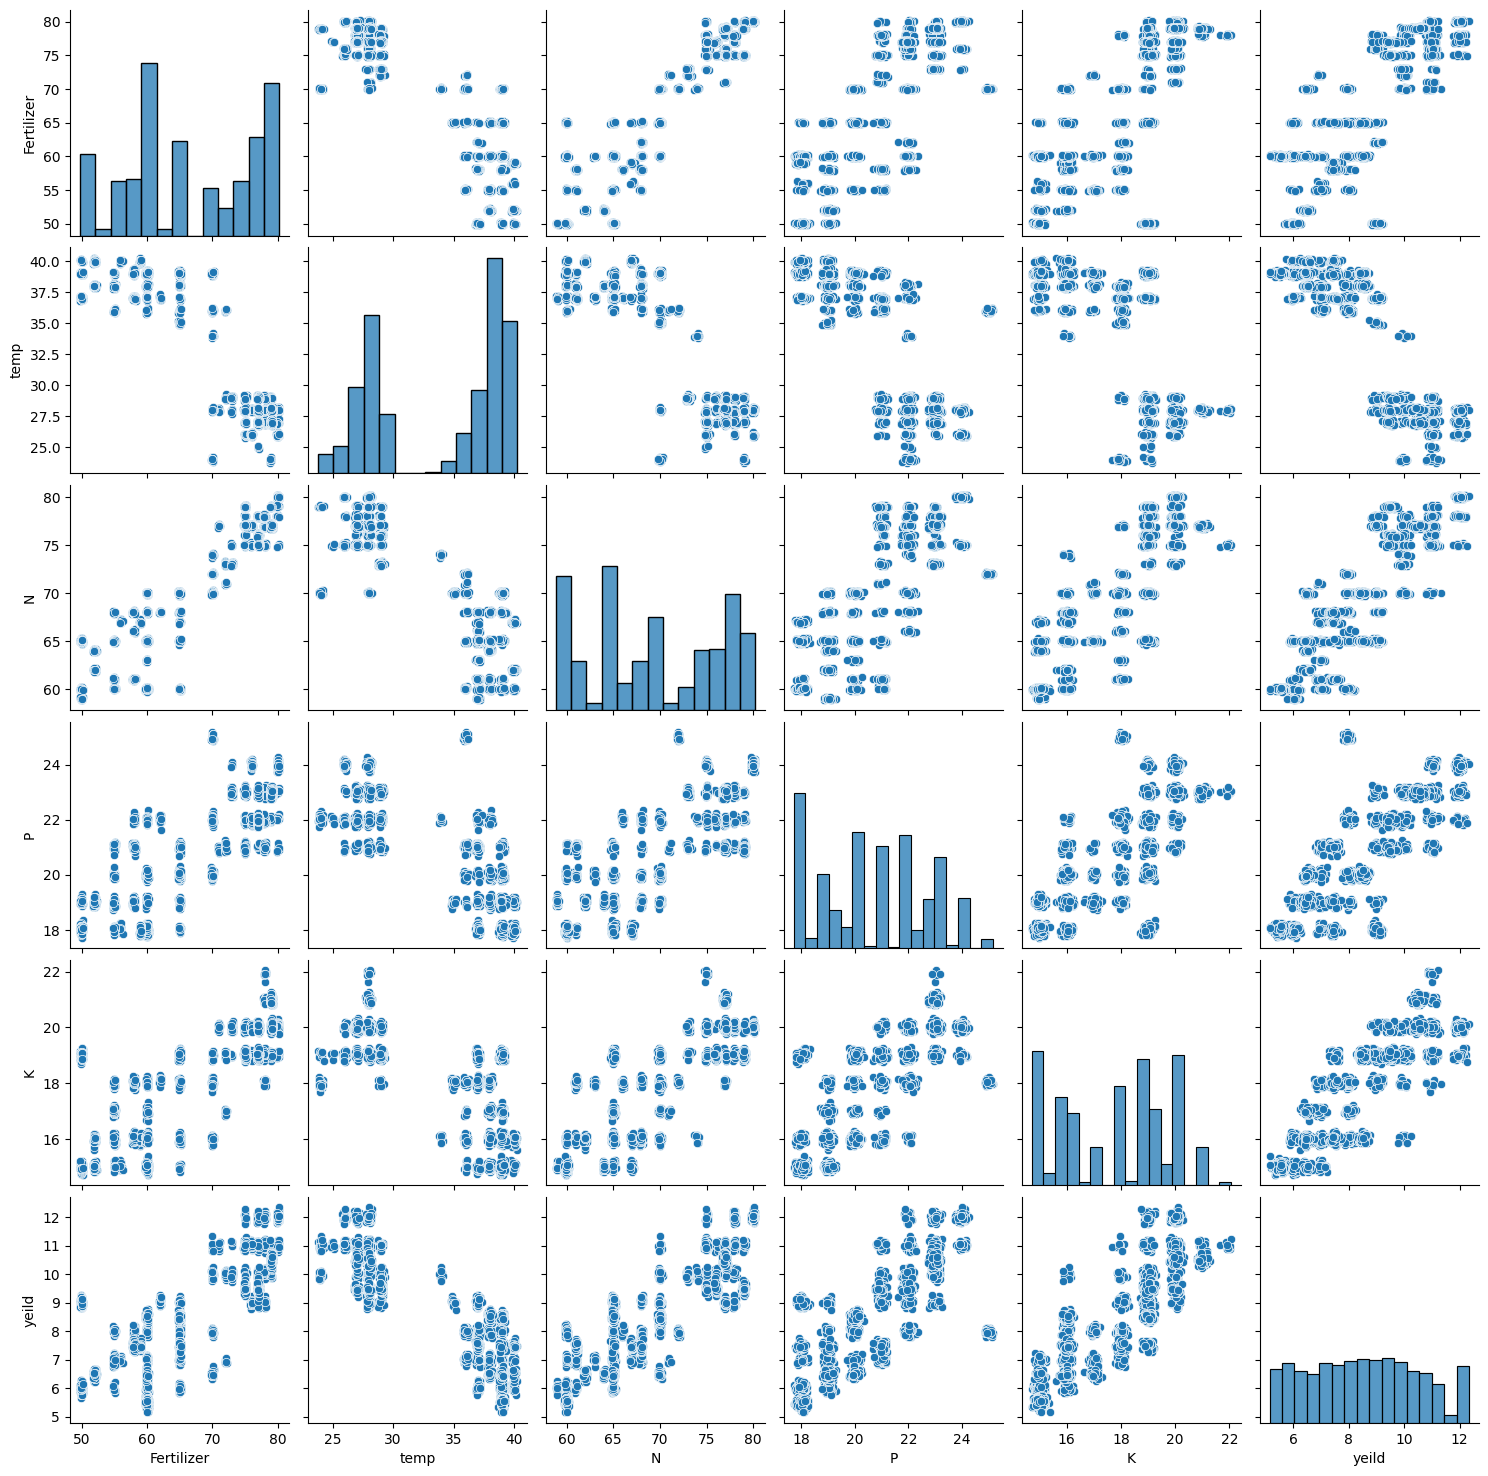

In [15]:
sns.pairplot(df[['Fertilizer','temp','N', 'P', 'K', 'yeild']])
plt.savefig('pairplot_yield.png')
plt.show()



In [16]:
df.isnull().sum()

Fertilizer    0
temp          0
N             0
P             0
K             0
yeild         0
dtype: int64

In [17]:
df.describe()

,Fertilizer,temp,N,P,K,yeild
count,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000,2596.000000
mean,66.487433,33.848237,69.522900,20.708194,17.806268,8.533832
std,9.747669,5.371279,6.802806,1.973419,1.940037,1.938789
min,49.751436,23.771310,58.839466,17.723223,14.704883,5.150745
25%,59.865423,28.000000,64.834635,18.988224,15.975932,6.929404
50%,65.011969,36.965121,69.894076,20.889579,18.061975,8.501720
75%,76.943112,38.928914,76.845919,22.125618,19.133858,10.045179
max,80.223893,40.272480,80.218705,25.162178,22.064666,12.337651


Training Different Models

In [18]:
x=df.drop('yeild', axis=1)
y=y=df['yeild']
y.shape

(2596,)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'Lasso':Lasso(),
    'Ridge':Ridge()
}
splits = [0.15, 0.25, 0.35,0.45]
results = pd.DataFrame(columns=['Model', 'Train-Test Split', 'MAE', 'MSE', 'RMSE', 'R2'])
for split in splits:
    for name, model in models.items():
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        results = results.append({
            'Model': name,
            'Train-Test Split': split,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }, ignore_index=True)
results.to_csv('regression_metrics_results.csv', index=False)
print("Results saved to regression_metrics_results.csv")


C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: Fu

Results saved to regression_metrics_results.csv


C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({
C:\Users\ashridha\AppData\Local\Temp\ipykernel_7984\2482922708.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({


Selecting best model and split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)
rfr=RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print(f'MAE : {mean_absolute_error(y_test, y_pred)}')
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R2 Score : {r2_score(y_test, y_pred)}')

MAE : 0.11804199432100702
MSE : 0.03204228944618369
RMSE : 0.17900360176874566
R2 Score : 0.9911101209787008


Plots to check accuracy

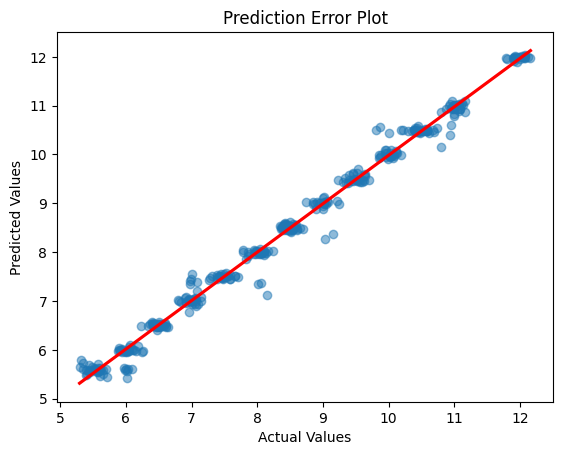

In [21]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred, line_kws={'color':'red'}, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Error Plot')
plt.savefig('Prediction Error Plot.png')
plt.show()

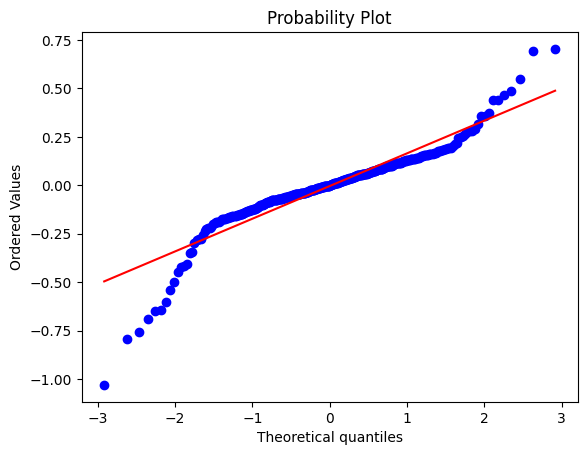

In [25]:
predicted_values = y_test.values
actual_values = y_pred
if len(predicted_values) != len(actual_values):
    raise ValueError("Predicted and Actual arrays must have the same length!")

residuals = actual_values - predicted_values
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(residuals, dist="norm", plot=plt)
plt.savefig('Probability Plot.png')
plt.show()

Deployment Phase

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
pp=ColumnTransformer(
    transformers=[
        ('StandardScale',sc,[0,1,2,3,4]),
    ],remainder="passthrough"
)
xtrain=pp.fit_transform(X_train)
xtest=pp.fit_transform(X_test)

In [35]:
rfr=RandomForestRegressor()
rfr.fit(xtrain,y_train)
y_pred=rfr.predict(xtest)

In [39]:
def prediction(Fertilizer,temp,N,P,K):
  features=np.array([[Fertilizer,temp,N,P,K]],dtype=object)
  trans_features=pp.transform(features)
  pred=rfr.predict(trans_features).reshape(-1,1)
  return pred[0][0]

c:\Users\ashridha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


12.082234463560471

In [41]:
import pickle
pickle.dump(rfr,open("dtr.pkl","wb"))
pickle.dump(pp,open("pp.pkl","wb"))